In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.utils as u

- Which music styles are present in the collection? Plot distribution. 
- - As the model predictions are activations, you need to decide what you consider as the final music style prediction for a track. If you want to consider the possibility of multiple styles per track, define some threshold for activation values. Otherwise, if you want to have a single music style per track, use the one with the maximum activation.
- - We have 400 values which may be a challenge to fit in a compact plot. Predicted styles have a parent broad genre category (all style tags have a format `genre—style`). Therefore you can instead report distribution for parent broad genres. In any case, also provide full results as a separate TSV file (similar to how we report genre distribution in MTG-Jamendo).


In [2]:
pickle_file_path = 'descriptors/discogs-400-genre.pkl'

discogs_df = u.read_pickle_descriptors(pickle_file_path)

discogs_df

,file_path,Blues---Boogie Woogie,Blues---Chicago Blues,Blues---Country Blues,Blues---Delta Blues,Blues---Electric Blues,Blues---Harmonica Blues,Blues---Jump Blues,Blues---Louisiana Blues,Blues---Modern Electric Blues,...,Rock---Symphonic Rock,Rock---Technical Death Metal,Rock---Thrash,Rock---Twist,Rock---Viking Metal,Rock---Yé-Yé,Stage & Screen---Musical,Stage & Screen---Score,Stage & Screen---Soundtrack,Stage & Screen---Theme
0,audio/audio/audio.002/7D/7DyRfspnGYcUhCAMcCys2...,4.451908e-06,3.228681e-05,6.951516e-05,1.953550e-05,4.970062e-05,4.157957e-05,4.013963e-06,4.964849e-05,0.000529,...,9.275849e-05,9.090259e-06,1.763737e-05,6.878970e-06,5.752748e-05,2.217593e-05,0.000179,2.452043e-04,0.001781,0.000303
1,audio/audio/audio.002/1p/1pCHi3zHca7jgR27Sfu7L...,4.278032e-07,2.946841e-06,3.044410e-05,3.886121e-05,6.874844e-06,1.103533e-05,1.047089e-06,2.279152e-05,0.000012,...,1.020333e-02,6.146311e-04,3.653177e-04,2.354364e-06,2.532518e-03,7.484943e-05,0.000864,4.735425e-03,0.008591,0.002386
2,audio/audio/audio.002/6o/6oOqQg46N239sc5Ev3THO...,3.872560e-07,2.697904e-07,1.327175e-07,4.309202e-07,1.469838e-06,5.664926e-07,1.016157e-07,8.969807e-08,0.000002,...,2.523936e-05,9.738255e-08,9.308232e-06,3.978661e-06,1.469989e-06,4.298015e-06,0.000020,1.765333e-04,0.000767,0.000037
3,audio/audio/audio.002/0V/0VjJm2ufYkgLgoPhJriQe...,1.759596e-04,1.088045e-03,3.296832e-04,5.068047e-04,6.498355e-04,2.711314e-04,1.622999e-04,3.108724e-03,0.002035,...,4.110306e-03,5.613072e-07,9.117610e-06,6.952372e-05,2.116941e-05,1.151464e-05,0.004603,2.114274e-03,0.012743,0.013516
4,audio/audio/audio.002/2J/2JWEsdT3tEsebXCBVfXNZ...,1.770138e-04,2.896588e-04,5.513771e-04,4.766285e-04,1.318181e-03,4.399267e-04,1.103653e-04,8.725476e-04,0.001820,...,1.251733e-02,2.429027e-05,8.117764e-05,1.732535e-04,2.878931e-04,4.741205e-04,0.020121,7.169301e-03,0.010622,0.005165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,audio/audio/audio.000/4K/4KDNRh9Oor80z3XIxdWlu...,3.778556e-10,9.177239e-08,2.136857e-07,2.646803e-08,2.476288e-07,2.561014e-07,8.346261e-09,3.701581e-09,0.000015,...,5.394688e-07,2.106006e-08,6.518753e-07,4.266482e-09,1.793447e-07,9.462668e-09,0.000002,2.353929e-07,0.000017,0.000009
2096,audio/audio/audio.000/6u/6uxU5NRP5gHWHeNPZM88f...,4.954517e-07,1.454839e-06,1.405991e-06,4.723133e-07,5.013582e-07,2.949994e-07,8.656120e-07,4.544422e-08,0.000003,...,5.429816e-05,4.459454e-06,1.422365e-05,1.449491e-06,2.036070e-05,4.934452e-06,0.000028,1.952043e-05,0.000469,0.000072
2097,audio/audio/audio.000/0E/0EKBV6GybPtALXUgWqWry...,2.419018e-04,5.229341e-05,9.226522e-04,3.121439e-04,3.850707e-04,6.093562e-04,1.730482e-06,1.768579e-04,0.001581,...,1.386868e-02,1.864219e-05,5.248339e-05,3.184811e-05,3.506609e-04,5.941896e-04,0.001717,3.284598e-04,0.005001,0.000791
2098,audio/audio/audio.000/2s/2sWVKWb6hxcjOqb0m4KYM...,2.812842e-04,4.089353e-05,2.477926e-04,6.578126e-05,3.747888e-04,1.525385e-03,1.413210e-04,2.108922e-04,0.001200,...,1.994945e-02,5.285769e-05,2.817364e-04,2.514714e-04,1.722904e-03,6.020629e-03,0.004050,1.265435e-03,0.005940,0.001764


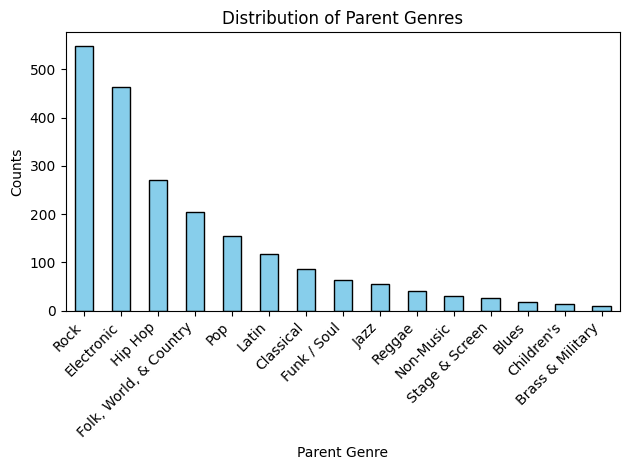

Counts of parent genres:
Rock                      549
Electronic                463
Hip Hop                   271
Folk, World, & Country    204
Pop                       155
Latin                     117
Classical                  86
Funk / Soul                64
Jazz                       56
Reggae                     40
Non-Music                  30
Stage & Screen             26
Blues                      17
Children's                 13
Brass & Military            9
Name: count, dtype: int64


In [3]:
pickle_file_path = 'descriptors/discogs-400-genre.pkl'

discogs_df = u.read_pickle_descriptors(pickle_file_path)

# Find column name with max value in each row
# discard first column as it contains filepath
max_column_per_row = discogs_df.loc[:, discogs_df.columns[1:]].idxmax(axis='columns')

# Create a DataFrame with the counts and column name
distribution_counts_df = pd.DataFrame({'Genre': max_column_per_row.value_counts().index, 'Count': max_column_per_row.value_counts().values})

# Save the DataFrame to a TSV file with column names
distribution_counts_df.to_csv('metadata/genre-distribution_counts.tsv', sep='\t', index=False)

# Counting only parent genre divided by "--"
parent_genre_counts = max_column_per_row.apply(lambda x: x.split('---')[0]).value_counts()

# Plot the bar chart
ax = parent_genre_counts.plot(kind="bar", color='skyblue', edgecolor='black')

# Set labels and title
ax.set_xlabel('Parent Genre')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Parent Genres')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Counts of parent genres:")
print(parent_genre_counts)



In [4]:
pickle_file_path = 'descriptors/descriptors-but-genre-v2.pkl'

descriptors_df = u.read_pickle_descriptors(pickle_file_path)
descriptors_df.head(10)

,file_path,loudness,tempo,voice_instrumental,danceability,arousal_valence,keyscale_edma,keyscale_krumhansl,keyscale_temperly
0,audio/audio.004/3k/3knBY7RDVHQIXYhPVxw54d.mp3,-7.356347,68.0,0.001786,0.998107,"(4.319932460784912, 5.401784896850586)","(Bb, minor, 0.8240213394165039)","(Bb, minor, 0.7993292212486267)","(Bb, minor, 0.780987560749054)"
1,audio/audio.004/0D/0DvIRwRcYA62RUU1ohuEMu.mp3,-13.337607,97.0,0.028662,0.279656,"(3.910822868347168, 3.2444705963134766)","(A, minor, 0.8682339787483215)","(A, minor, 0.882485032081604)","(A, minor, 0.7881932258605957)"
2,audio/audio.004/59/59yE5Hg5TSz86CoasCpDQw.mp3,-6.090718,106.0,0.918112,0.052946,"(3.6308364868164062, 6.089412689208984)","(D, minor, 0.847265899181366)","(D, minor, 0.8908575177192688)","(D, minor, 0.8670452833175659)"
3,audio/audio.004/5u/5uRdrA2MOgkzCMz6HeybuJ.mp3,-8.232218,108.0,0.108788,0.653288,"(6.055447101593018, 8.030257225036621)","(Bb, minor, 0.8202688694000244)","(Bb, minor, 0.7761901021003723)","(Bb, minor, 0.6285903453826904)"
4,audio/audio.004/3l/3ln6OppFo6QrW4ZkksFvtr.mp3,-6.471380,143.0,0.105858,0.290942,"(6.243907928466797, 6.7491455078125)","(F, minor, 0.793302595615387)","(F, minor, 0.8037965297698975)","(F, minor, 0.7924551367759705)"
5,audio/audio.004/0c/0crcJJ2SqTlj7UQLZGT3Fy.mp3,-6.980404,124.0,0.000811,0.982690,"(5.0861496925354, 6.433591842651367)","(F#, major, 0.7113388180732727)","(F#, major, 0.7968453764915466)","(F#, major, 0.8814998269081116)"
6,audio/audio.004/6z/6zwUagp1dZwCGmWrsg94ig.mp3,-8.974324,132.0,0.028675,0.999816,"(5.057689189910889, 6.173500061035156)","(A, minor, 0.5534742474555969)","(A, major, 0.5200775861740112)","(A, minor, 0.5086244940757751)"
7,audio/audio.004/66/66KcXPDs1hr8T06KvlJCeA.mp3,-9.848673,127.0,0.957427,0.997447,"(5.024705410003662, 4.486588001251221)","(Ab, major, 0.7687847018241882)","(Ab, major, 0.7517671585083008)","(Ab, major, 0.5954258441925049)"
8,audio/audio.004/6S/6SbsOmpnFBm7MlhrUd6kd3.mp3,-10.138447,122.0,0.792080,0.943437,"(5.420707702636719, 5.9136552810668945)","(E, minor, 0.4277583360671997)","(E, major, 0.42753326892852783)","(C, major, 0.47480687499046326)"
9,audio/audio.004/3e/3EGzq5oQtJe4MxWv1fD2W0.mp3,-13.101999,104.0,0.580306,0.215262,"(4.088090419769287, 3.8809750080108643)","(Ab, minor, 0.4931354522705078)","(Ab, minor, 0.4766978621482849)","(Ab, minor, 0.5566366314888)"


- How fast and danceable is the music? Plot tempo and danceability distribution.


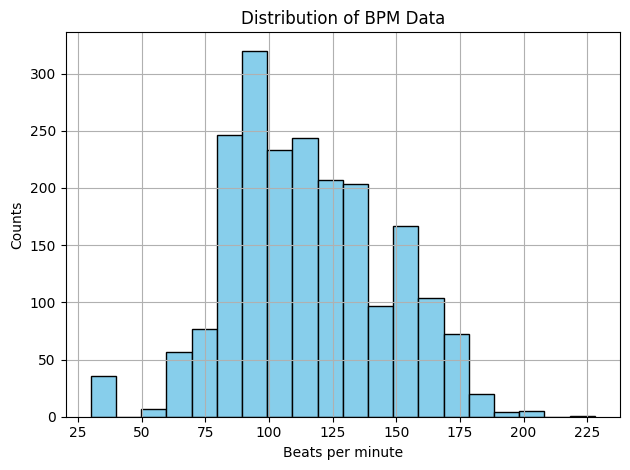

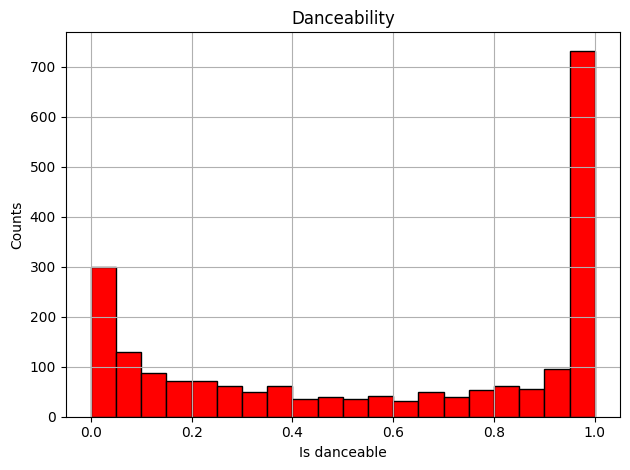

In [5]:

plt.hist(descriptors_df['tempo'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of BPM Data')
plt.xlabel('Beats per minute')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.hist(descriptors_df['danceability'], color='red', edgecolor='black', bins=20)
plt.title('Danceability')
plt.xlabel('Is danceable')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

- How is music represented in terms of arousal/valence emotion space? Plot a 2D distribution.


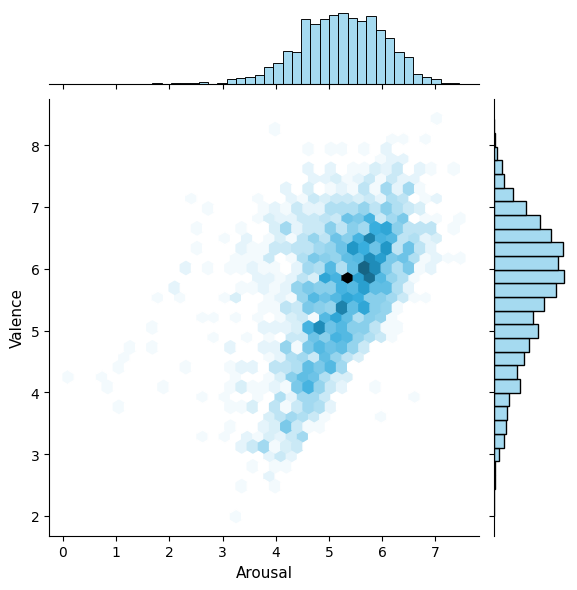

In [6]:
arousal = descriptors_df['arousal_valence'].apply(lambda x: x[0])
valence = descriptors_df['arousal_valence'].apply(lambda x: x[1])
joint_plot = sns.jointplot(x=arousal, y=valence, kind='hex', color='skyblue')
joint_plot.set_axis_labels('Arousal', 'Valence', fontsize=11)
plt.show()

- What about loudness? Plot integrated loudness LUFS distribution.


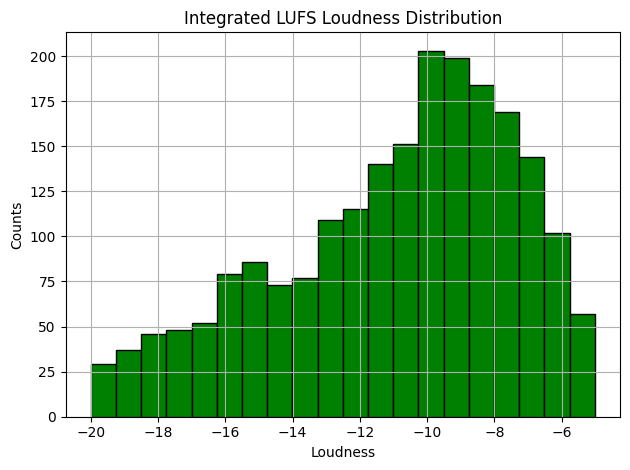

In [7]:
plt.hist(descriptors_df['loudness'], color='green', edgecolor='black', bins=20)
plt.title('Integrated LUFS Loudness Distribution')
plt.xlabel('Loudness')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

- Which keys/scales are used in the collection? Plot distribution according to the three profiles we used.


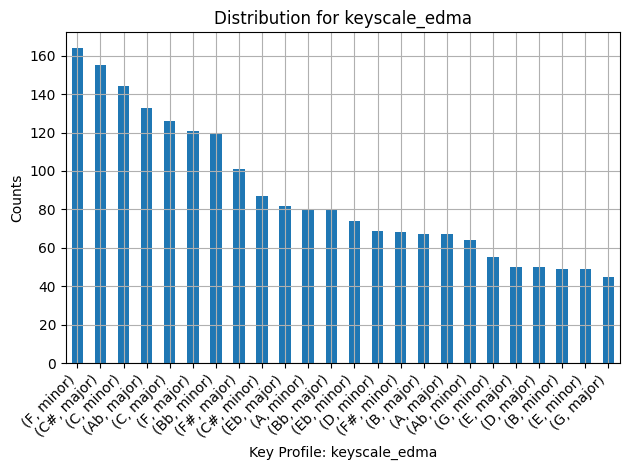

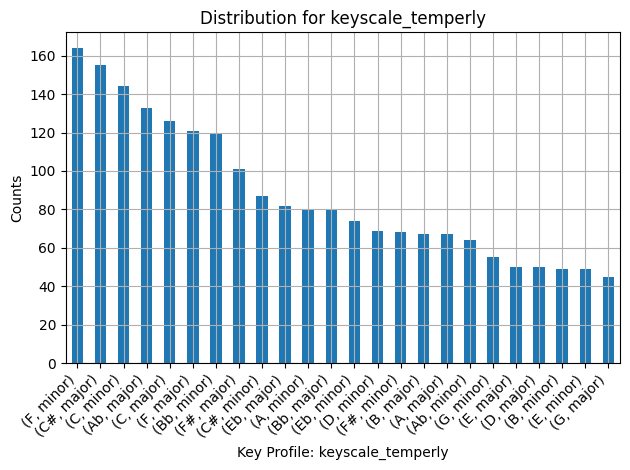

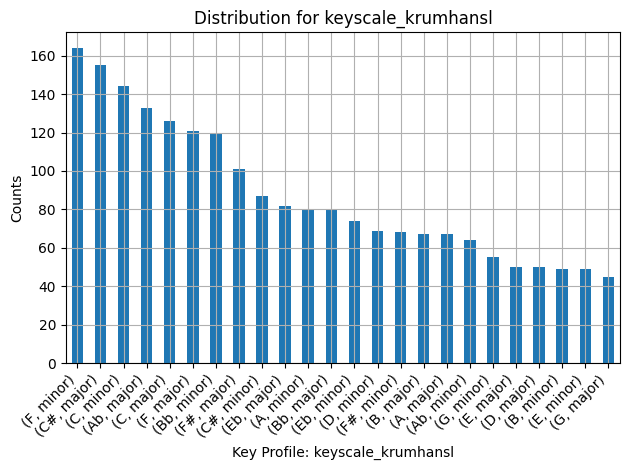

In [8]:
profiles = ["keyscale_edma", "keyscale_temperly", "keyscale_krumhansl"]

for key_profile in profiles:
    profile_counts = descriptors_df["keyscale_edma"].apply(lambda x: (x[0],x[1]) ).value_counts()

    profile_counts.plot(kind='bar')
    plt.xlabel(f'Key Profile: {key_profile}')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)  
    plt.title(f'Distribution for {key_profile}')
    plt.tight_layout()  # Ensures all elements are properly spaced
    plt.show()


- How much of the music is vocal vs instrumental? 


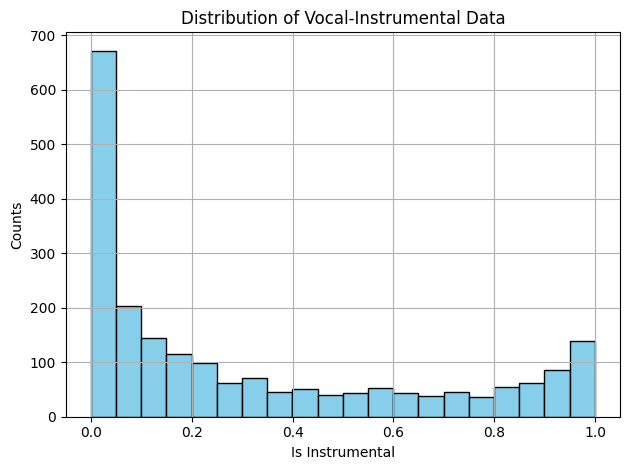

In [9]:

plt.hist(descriptors_df['voice_instrumental'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of Vocal-Instrumental Data')
plt.xlabel('Is Instrumental')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
